<a href="https://colab.research.google.com/github/caofengnian/A-MapReduce-practice/blob/master/predict_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Build and Train the model

## Read training data

In [0]:
dataset = '/content/drive/My Drive/safety/dprocessed.csv'
data_train = pd.read_csv(dataset)

## Split data
* Different training data size may cause different results, but not as big as well. There is a suitable size.
* ref: https://machinelearningmastery.com/impact-of-dataset-size-on-deep-learning-model-skill-and-performance-estimates/

In [0]:
from sklearn.model_selection import train_test_split
X = data_train.drop(['bookingID','label'],axis =1)
y = data_train['label']
# X = data_train.drop(['bookingID','label'], axis =1)
# y = data_train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 23)

## Balance the data (only training data)
* The common data-sampling approaches for handling class imbalance include: Random Over-Sampling (ROS), Random Under-Sampling (RUS), and Synthetic Minority Over-Sampling Technique (SMOTE)
ref: https://link.springer.com/article/10.1186/s40537-018-0151-6
* Right way to balance data
ref:https://beckernick.github.io/oversampling-modeling/
* AUC is insensitive to imbalanced data we will not balance it.

In [0]:
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


# print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Before OverSampling, counts of label '1': 6358
Before OverSampling, counts of label '0': 14642 

After OverSampling, the shape of train_X: (29284, 7)
After OverSampling, the shape of train_y: (29284,) 

After OverSampling, counts of label '1': 14642
After OverSampling, counts of label '0': 14642


In [0]:
#X_train_smtr = pd.DataFrame({'Accuracy': X_train_sm[:, 0], 'Bearing': X_train_sm[:, 1], 'acceleration_x': X_train_sm[:, 2], 'acceleration_y': X_train_sm[:, 3], 'acceleration_z': X_train_sm[:, 4], 'gyro_x': X_train_sm[:, 5], 'gyro_y': X_train_sm[:, 6], 'gyro_z': X_train_sm[:, 7], 'second': X_train_sm[:, 8], 'Speed': X_train_sm[:, 9], 'acc': X_train_sm[:, 10], 'Magnitude': X_train_sm[:, 11], 'Bearing_turn': X_train_sm[:, 12], 'Distance': X_train_sm[:, 13], 'slope': X_train_sm[:, 14]})
# X_train_smtr = pd.DataFrame({'second': X_train_sm[:, 0], 'Speed': X_train_sm[:, 1], 'acc': X_train_sm[:, 2], 'Magnitude': X_train_sm[:, 3], 'Bearing_turn': X_train_sm[:, 4], 'Distance': X_train_sm[:, 5], 'slope': X_train_sm[:, 6]})
# y_train_smtr = pd.DataFrame({'label':y_train_sm})

##Modeling
* choose classifier
ref:https://www.kaggle.com/klaudiajankowska/binary-classification-methods-comparison#Table-of-Contents:

### Without reduction

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import xgboost as XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier


In [0]:
# from vecstack import stacking

In [0]:
#class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
log = LogisticRegression(random_state=53,n_jobs=-1)
tree = DecisionTreeClassifier(max_depth = 4)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
rf = RandomForestClassifier(random_state=53, n_jobs=-1, n_estimators=100, max_depth=4)
knn = KNeighborsClassifier()
gnb = GaussianNB()
gbc = GradientBoostingClassifier (random_state=53,n_estimators=100,learning_rate=0.05)
lgb = LGBMClassifier(
    n_jobs = -1,
    max_depth = 4,
    subsample = 1,
    n_estimators = 100,
    learning_rate = 0.1,
    colsample_bytree = 1,
    objective = 'binary',
    boosting_type = 'gbdt')

xgb_model = xgb.XGBClassifier (random_state=7, n_jobs=-1, learning_rate=0.02, 
                   n_estimators=100, max_depth=4)

svm_clf = svm.SVC(probability=True)


models = [log,tree,lda,qda,rf,knn,gnb,gbc,lgb,xgb_model,svm_clf]
# S_train, S_test = stacking(models,X_train, y_train, X_test,   
                          #  regression=False,mode='oof_pred_bag',needs_proba=False,
                          #  metric=metrics.roc_auc_score,n_folds=4,stratified=True,
                          #  shuffle=True,random_state=41)
model_names = {rf:'RandomForest', gbc:'GradientBoostingClassifier', log:'LogisticRegression',
               gnb:'GaussianNB', lgb:'LGBMClassifier', tree:'DecisionTreeClassifier',
               xgb_model:'XGBClassifier',svm_clf:'SVM',lda:'LinearDiscriminantAnalysis',
               qda:'QuadraticDiscriminantAnalysis',knn:'KNeighborsClassifier'}

In [7]:
model_scores={}
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

for clf_model in models:
  scores = cross_validate(clf_model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, verbose=2)
  sorted(scores.keys())
  model_scores[model_names[clf_model]] = [scores['fit_time'].mean(),scores['score_time'].mean(), scores['test_accuracy'].mean(),
            scores['test_precision_macro'].mean(),scores['test_recall_macro'].mean(),
            scores['test_f1_weighted'].mean(),scores['test_roc_auc'].mean()]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [8]:
model_scores = pd.DataFrame.from_dict(model_scores, orient= 'index', columns=['Fitting time', 'Scoring time','Accuracy','Precision','Recall','F1_score', 'AUC_ROC'])
model_scores

,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
LogisticRegression,0.577905,0.055273,0.773605,0.715060,0.567973,0.718630,0.693113
DecisionTreeClassifier,0.378034,0.018358,0.777641,0.740242,0.572138,0.722529,0.681648
LinearDiscriminantAnalysis,0.304998,0.063488,0.781462,0.723008,0.594480,0.739175,0.728081
QuadraticDiscriminantAnalysis,0.185153,0.124443,0.758397,0.654796,0.599223,0.732534,0.703908
RandomForest,3.259564,0.534276,0.780741,0.778164,0.566823,0.719064,0.708425
KNeighborsClassifier,0.059325,1.098890,0.726035,0.564224,0.532798,0.682733,0.565210
GaussianNB,0.023932,0.032175,0.736990,0.622383,0.593714,0.719928,0.643883
GradientBoostingClassifier,7.182204,0.056567,0.782831,0.756945,0.579457,0.729394,0.720798
LGBMClassifier,0.958825,0.189537,0.781967,0.739913,0.584958,0.733122,0.724346
XGBClassifier,6.963101,0.104412,0.781534,0.759716,0.574218,0.725124,0.716436


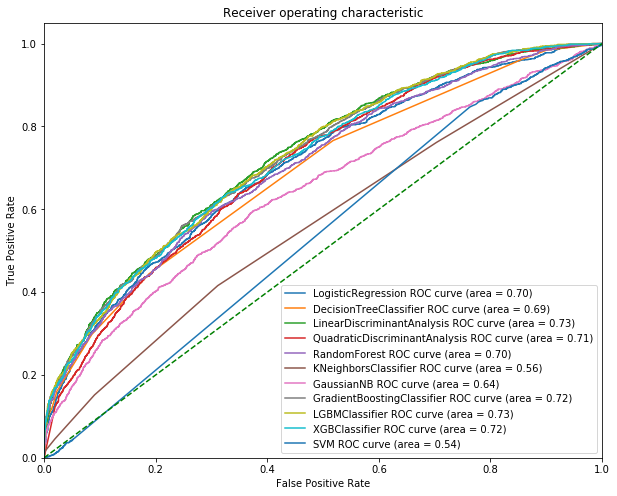

In [10]:
plt.figure(figsize=(10, 8))
acc_auc={}
# model = xgb.XGBClassifier (random_state=53, n_jobs=-1, learning_rate=0.05,n_estimators=100, max_depth=4)
# model.fit(S_train,y_train)
# y_pred = model.predict(S_test)
# pred = model.predict_proba(S_test)[:,1]
# stacked_acc = metrics.accuracy_score (y_test,y_pred)
# stacked_auc = metrics.roc_auc_score(y_test,pred)
# fpr, tpr, _ = metrics.roc_curve(y_test, pred)
# plt.plot(fpr, tpr, color='b', label='Stacked ROC curve (area = %0.2f)' % stacked_auc)

for clf_model in models:
  clf_model.fit(X_train,y_train)
  y_pred = clf_model.predict(X_test)
  y_pred_proba = clf_model.predict_proba(X_test)[:,1]
  #y_pred = binarize([pred], 0.7)[0]
  #print(model_names[clf_model]+ 'training accuracy: ', metrics.accuracy_score(y_train_sm,clf_model.predict(X_train_sm)))
  acc = metrics.accuracy_score(y_test,y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  acc_auc[model_names[clf_model]] = [acc, auc]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, label = model_names[clf_model] +' ROC curve (area = %0.2f)' % auc)



plt.plot([0, 1], [0, 1], color='g', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc=0)


In [11]:
acc_auc = pd.DataFrame.from_dict(acc_auc, orient= 'index', columns=['Accuracy','AUC'])
acc_auc

,Accuracy,AUC
LogisticRegression,0.763074,0.703788
DecisionTreeClassifier,0.764923,0.688451
LinearDiscriminantAnalysis,0.770136,0.727813
QuadraticDiscriminantAnalysis,0.745922,0.705038
RandomForest,0.766101,0.702895
KNeighborsClassifier,0.713133,0.562330
GaussianNB,0.726753,0.639618
GradientBoostingClassifier,0.769464,0.724921
LGBMClassifier,0.770977,0.725766
XGBClassifier,0.769632,0.720022


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4405
           1       0.00      0.00      0.00      1542

    accuracy                           0.74      5947
   macro avg       0.37      0.50      0.43      5947
weighted avg       0.55      0.74      0.63      5947



![alt text](https://i.stack.imgur.com/U0hjG.png)

ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

<Figure size 432x288 with 0 Axes>

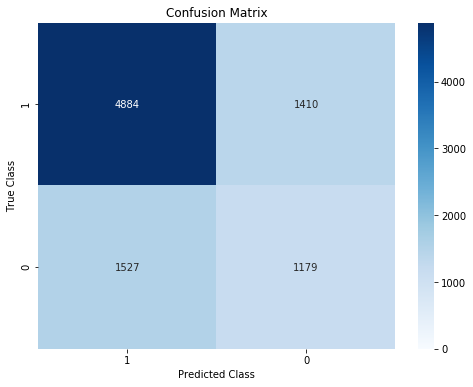

In [0]:
plt.figure()
cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### Hyperparameter tuning (GridSearchCV)

ref : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 5)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(random_grid)

{'max_depth': [2, 29, 56, 83, 110, None],
 'n_estimators': [100, 575, 1050, 1525, 2000]}


In [0]:
rf = RandomForestClassifier()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_clf = GridSearchCV(rf, random_grid, cv=5, verbose=5, n_jobs=-1)
rf_clf.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.4s


KeyboardInterrupt: ignored



---



# Ensemble
* (1) reduce features by feature importance
* (2) ensemble features with different classifier

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin,clone
from sklearn.model_selection import KFold
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models,weights):
        self.models = models
        self.weights = np.array(weights)
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
             model.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.sum(self.weights*predictions, axis=1)

In [0]:
aver_model = AveragingModels(models=(model,gbc,rf,log,gnb),weights=(0.6,0.1,0.2,0.05,0.05))

### Deep learning (Neural Networks)

In [0]:
data_keras = data_train
X_keras = data_keras.drop(['bookingID','label'], axis =1)
y_keras = data_keras['label']
X_train, X_test, y_train, y_test = train_test_split(X_keras,y_keras, test_size=0.2, random_state = 23)

In [0]:
import keras
from keras import backend as K

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from sklearn.utils import class_weight
from keras import optimizers
max_features = 360
maxlen = 15
batch_size = 10
embedding_dims = 50
filters = 100
kernel_size = 3
hidden_dims = 250
epochs = 4

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


#X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
#X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

model = Sequential()

model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# use max pooling:
model.add(GlobalMaxPooling1D())

# add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.add(Dense(30, input_dim=k, init='uniform', activation='relu'))
model.add(Dense(15, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


opt = optimizers.adam(lr = 0.006, beta_1 = 0.9, beta_2 = 0.999, clipnorm = 1. , epsilon= 1e-08)
model.compile(loss=dice_coef,
              optimizer= opt,
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          class_weight = class_weights,
          epochs=epochs,
          validation_data=(X_test, y_test))
print(model.evaluate(X_test, y_test))

Train on 19200 samples, validate on 4800 samples
Epoch 1/4
19200/19200 [==============================] - 15s 785us/step - loss: 0.2973 - acc: 0.6964 - val_loss: 0.2924 - val_acc: 0.7002
Epoch 2/4
19200/19200 [==============================] - 14s 720us/step - loss: 0.2940 - acc: 0.6964 - val_loss: 0.2924 - val_acc: 0.7002
Epoch 3/4
19200/19200 [==============================] - 14s 721us/step - loss: 0.2923 - acc: 0.6964 - val_loss: 0.2924 - val_acc: 0.7002
Epoch 4/4
4800/4800 [==============================] - 0s 41us/step
[0.10121591414014498, 0.7002083333333333]


## Tree Models

## Linear Models

In [0]:
linear_based_models = {
    "en": ElasticNet(),
    "hr": HuberRegressor(),
    "lr": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "sgd": SGDRegressor(), 
    "pa": PassiveAggressiveRegressor()
}

## Tuning GradientBooastingRegressor (TODO)（It has highest score.）

## Stacked Model (TODO) (can compare with the current stack)
* Layer 1 Naive Bayes (NB), Multilayer Perceptron Classifier (MLP)
* Layer 2 Logistic regression, Linear Discriminant Analysis(LDA) and XGBoost
* Layer 3 Meta learner

# Evaluation


*   ROC Curves and Area Under the Curve(AUC)
*   ROC more curve is better - Purpose of AUC
*   AUC is close to 0.5 (random guessing). AUC is close to 1 (perfect classifier)


## Tree-based models
* "dt": DecisionTreeRegressor(),
* "rf": RandomForestRegressor(),
* "ada": AdaBoostRegressor(),
* "gb": GradientBoostingRegressor(),
* "et": ExtraTreesRegressor(),
* "xgb": XGBRegressor(),
* "lgb": LGBMRegressor()



## Linear-based models
* "en": ElasticNet(),
* "hr": HuberRegressor(),
* "lr": LinearRegression(),
* "ridge": Ridge(),
* "lasso": Lasso(),
* "sgd": SGDRegressor(), 
* "pa": PassiveAggressiveRegressor()